<a href="https://colab.research.google.com/github/desaiankitb/pytorch-basics/blob/main/tutorial-pytorch-org/00_1_datasets_dataloaders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load data with PyTorch Datasets and DataLoaders

In [1]:
%matplotlib inline

##Datasets and DataLoaders
- Code for processing data samples can get messy and hard to maintain; we ideally want our dataset code to be decoupled from our model training code for better readability and modularity. PyTorch provides two data primitives: `torch.utils.data.DataLoader` and `torch.utils.data.Dataset` that allow you to use pre-loaded datasets as well as your own data. `Dataset` stores the samples and their corresponding lables, and `DataLoader` wraps an iterable around the `Dataset` to enable easy access to the samples. 

- PyTorch domain libraries provide a number of pre-loaded datasets (such as FashionMNIST) that subclass `torch.utils.data.Dataset` and implement functions specific to the perticular data. They can be used to prototype and benchmark your model. You can find them here [Image Datasets](https://pytorch.org/vision/stable/datasets.html),
[Text Datasets](https://pytorch.org/text/stable/datasets.html), and
[Audio Datasets](https://pytorch.org/audio/stable/datasets.html)

### Loading a dataset
- Here is an example of how to load the [Fashion-MNIST](https://research.zalando.com/welcome/mission/research-projects/fashion-mnist/) dataset from Torch Vision. Fashion-MNIST is a dataset of Zalando's article images consisting of 60,000 training examples and 10,000 test examples. Each example comprises a 28×28 greyscale image and an associated label from one of 10 classes. 

- We load the [Fashion-MNIST](https://pytorch.org/vision/stable/datasets.html#fashion-mnist) dataset with the following parameters: 

  - `root` is the path where the train/test data is stored, 
  - `train` specific training or test dataset, 
  - `download=True` downloads the data from the Internet if it's not available at `root`. 
  - `transform` and `target_transforrm` specify the feature and lable transformations. 

In [4]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt 

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Iterating and Visualising the Dataset

We can index `Datasets` manually like a list: `training_data[index]`. We use `matplotlib` to visualise samples in our training data. 

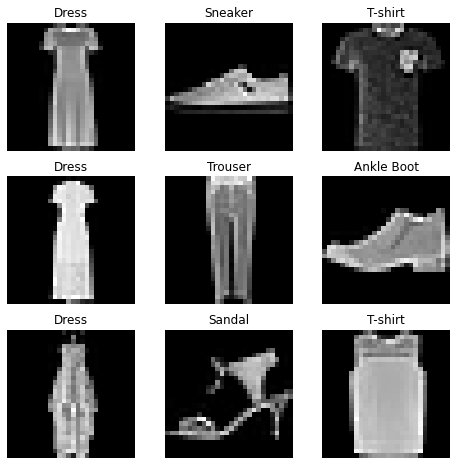

In [5]:
labels_map = {
    0: "T-shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot"
}
figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()